In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cabs=pd.read_csv(r'D:\Data_Science\Datasets\cabs-data.csv')

In [3]:
cabs.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [4]:
cabs['Status'].value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

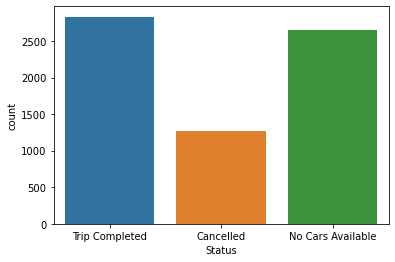

In [12]:
ax = sns.countplot(x="Status", data=cabs)

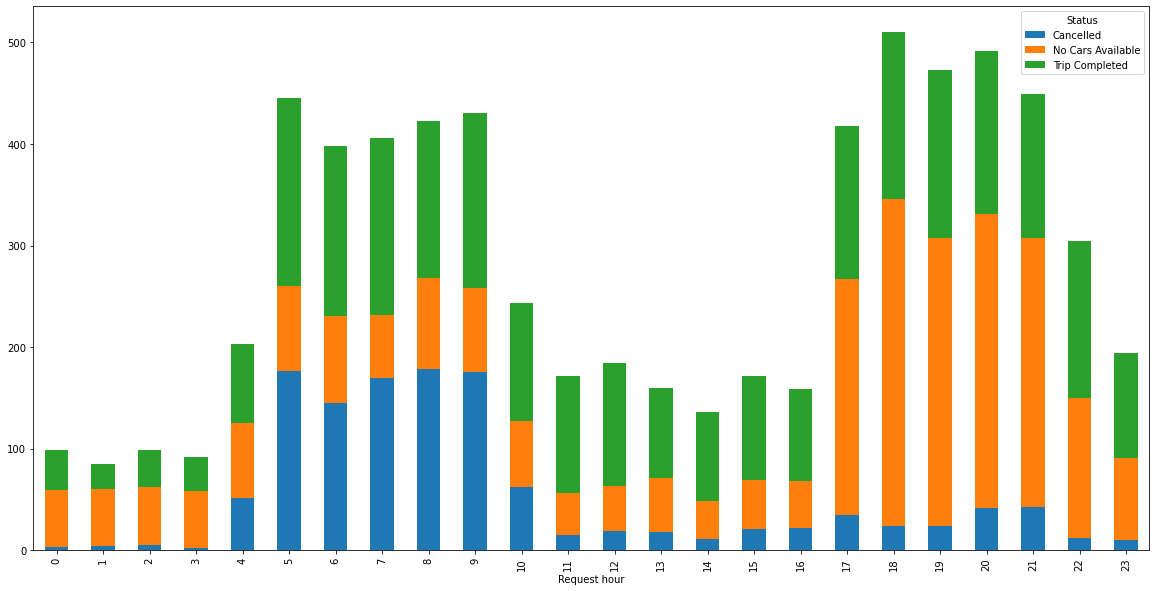

In [6]:
cabs['Request timestamp1']= pd.to_datetime(cabs['Request timestamp'])
cabs['Request hour']=cabs['Request timestamp1'].dt.hour
cabs.groupby(['Request hour','Status']).size().unstack().plot(kind='bar',stacked=True,figsize=(20,10))

In [7]:
cabs=cabs.assign(TD=pd.cut(cabs['Request hour'],[1,4,8,12,16,20,24],labels=['Early morning','morning','late morning','noon','evening','night']))
cabs.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request timestamp1,Request hour,TD
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00,2016-11-07 11:51:00,11,late morning
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47,2016-11-07 17:57:00,17,evening
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58,2016-12-07 09:17:00,9,late morning
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03,2016-12-07 21:08:00,21,night
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,2016-07-13 08:33:16,8,morning


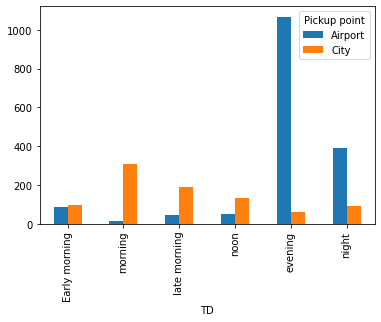

In [8]:
cabs[cabs['Status']=='No Cars Available'].groupby(['TD','Pickup point']).size().unstack().plot(kind='bar')

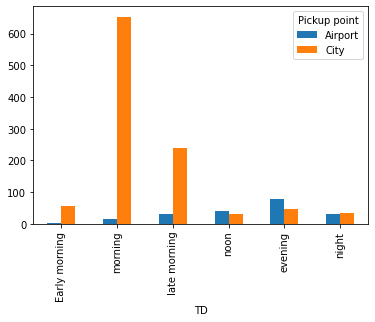

In [9]:
cabs[cabs['Status']=='Cancelled'].groupby(['TD','Pickup point']).size().unstack().plot(kind='bar')

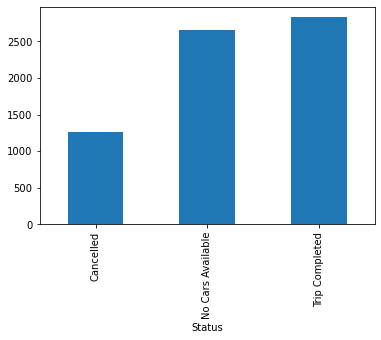

In [10]:
cabs[cabs['Status']!= 'Trips Completed'].groupby(['Status']).size().plot(kind='bar')

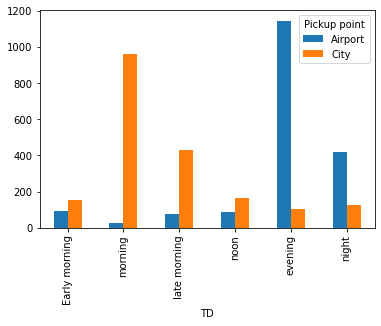

In [11]:
cabs['completed']=[x if x=='Trip Completed' else 'Trips not completed' for x in cabs['Status']]
cabs[cabs['completed']=='Trips not completed'].groupby(['TD','Pickup point']).size().unstack().plot(kind='bar')